In this file, we will be implementing all the changes that we outlined in the pdf file in regards to potential feature problems and the changes we will make to them

Let's start by importing the csv file in which we will change

In [2]:
import pandas as pd

df_clean = pd.read_csv('covid19-cdc-22208922_cleaned.csv')


In [3]:
df_clean.dtypes

case_month                          object
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

These need to be changed, with the following piece of code

In [4]:
df_clean['case_month'] = df_clean['case_month'].astype('category')
df_clean['age_group'] = df_clean['age_group'].astype('category')
df_clean['sex'] = df_clean['sex'].astype('category')
df_clean['race'] = df_clean['race'].astype('category')
df_clean['ethnicity'] = df_clean['ethnicity'].astype('category')
df_clean['process'] = df_clean['process'].astype('category')
df_clean['exposure_yn'] = df_clean['exposure_yn'].astype('category')
df_clean['current_status'] = df_clean['current_status'].astype('category')
df_clean['symptom_status'] = df_clean['symptom_status'].astype('category')
df_clean['hosp_yn'] = df_clean['hosp_yn'].astype('category')
df_clean['icu_yn'] = df_clean['icu_yn'].astype('category')
df_clean['death_yn'] = df_clean['death_yn'].astype('category')
df_clean['underlying_conditions_yn'] = df_clean['underlying_conditions_yn'].astype('category')

In [5]:
df_clean.dtypes

case_month                         category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

Let's start from the top of the list and outline each feature in detail as to how much information we can obtain and whether that feature will be useful to us

case_month

In [6]:
category_columns = df_clean.select_dtypes(['category']).columns
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])


df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

NameError: name 'df' is not defined

In [7]:
category_columns_card = df[category_columns].nunique()
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])
df_category_card

NameError: name 'df' is not defined

case_month

As there are no values missing then there is no reason to alter this feature, we will keep them. Below is the bar chart for this feature

<AxesSubplot: >

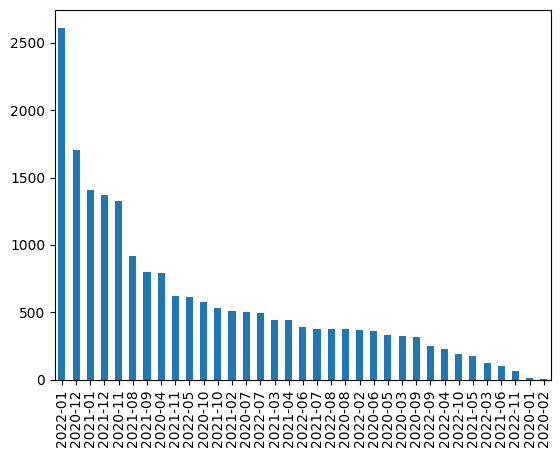

In [8]:
df_clean['case_month'].value_counts(dropna = False).plot(kind='bar')

age_group

There are a small amount of missing values that we can see below

<AxesSubplot: >

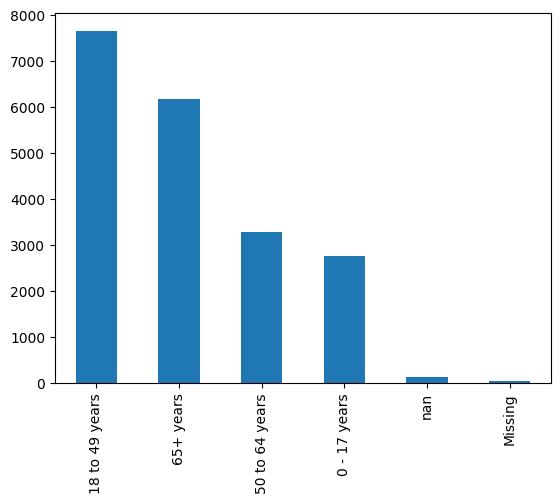

In [9]:
df_clean['age_group'].value_counts(dropna = False).plot(kind='bar')

Therefore we will be removing nan and missing

We will do this using the following piece of code

In [10]:
df_clean.dropna(subset=['age_group'], inplace=True)

<AxesSubplot: >

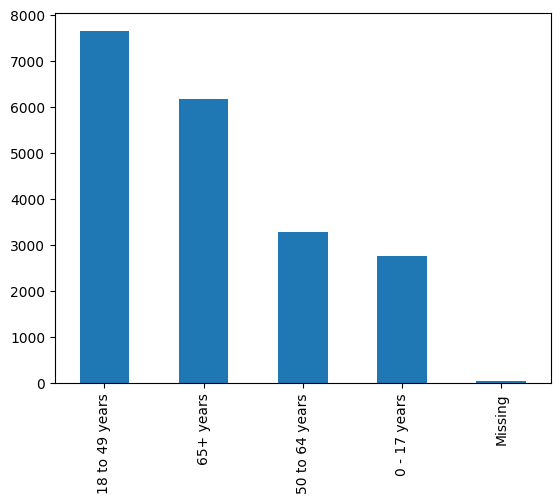

In [11]:
df_clean['age_group'].value_counts(dropna = False).plot(kind='bar')

We can now see that the rows for nan have been removed and we have good date to work with for this feature. We will keep Missing as it is a valid option, but the use of it will be extremely limited due to the fact that there is such little data for it.

sex

Once again we can drop the nan values for this feature and keep the other values as they are valid options outlined in the CSV dictionary

As we can see from the data, most concentration of data is under the value of Female and Male, with small amounts in the other valid options

<AxesSubplot: >

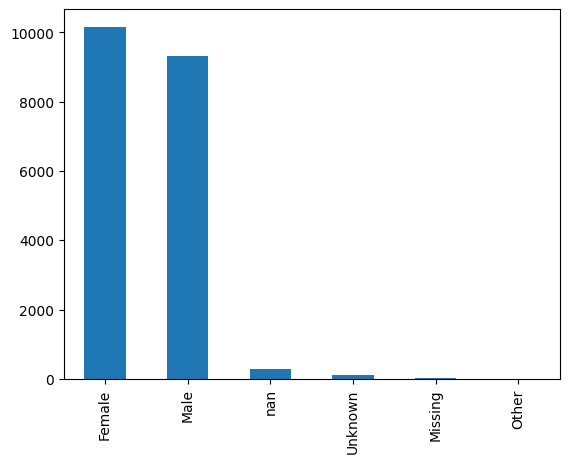

In [12]:
df_clean['sex'].value_counts(dropna = False).plot(kind='bar')

In [13]:
df_clean.dropna(subset=['sex'], inplace=True)

<AxesSubplot: >

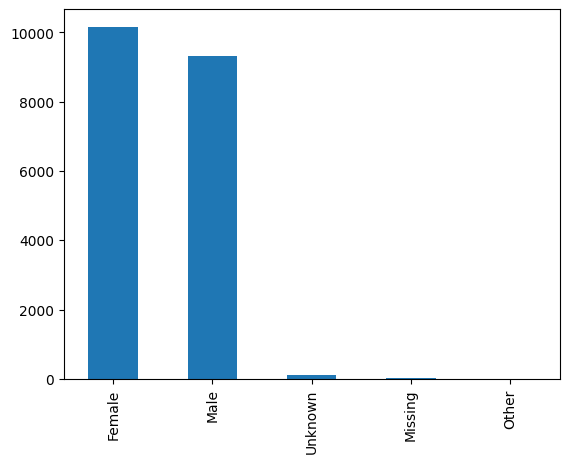

In [14]:
df_clean['sex'].value_counts(dropna = False).plot(kind='bar')

race

<AxesSubplot: >

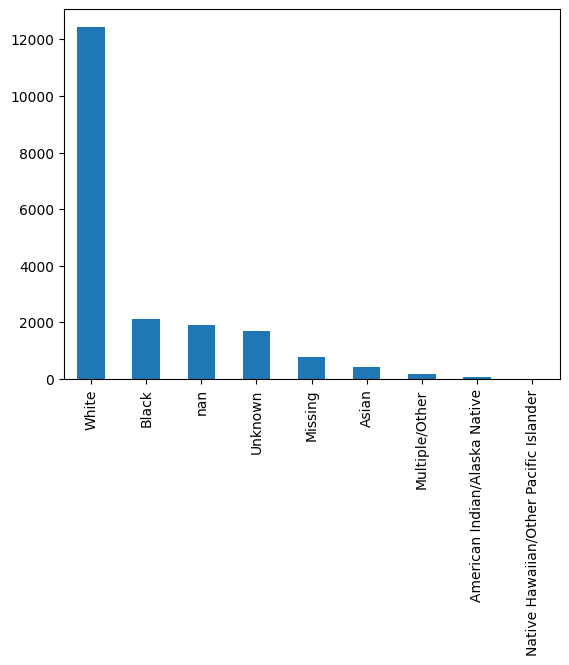

In [15]:
df_clean['race'].value_counts(dropna = False).plot(kind='bar')

In [16]:
df_clean.dropna(subset=['race'], inplace=True)

<AxesSubplot: >

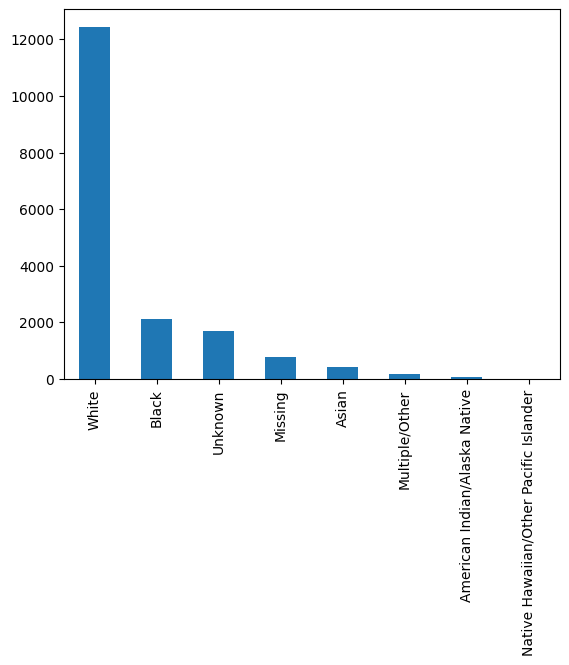

In [17]:
df_clean['race'].value_counts(dropna = False).plot(kind='bar')

Ethnicity

<AxesSubplot: >

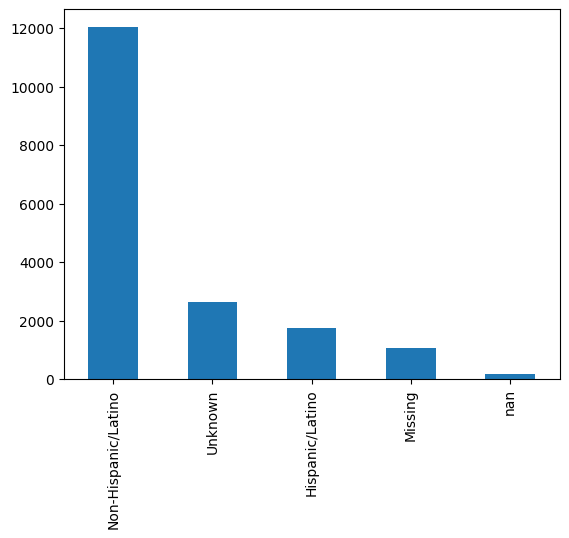

In [18]:
df_clean['ethnicity'].value_counts(dropna = False).plot(kind='bar')

As the vast majority of the information is focused on Non-Hispanic/Latino, and the data is very similar to that of Race, I don't feel the need to include this feature into our analysis, therefore we will be dropping this table

In [19]:
df_clean.drop('ethnicity', axis=1, inplace=True)

Let's just confirm that the column was dropped by looking at the table of features from before

In [20]:
df_clean.dtypes

case_month                         category
age_group                          category
sex                                category
race                               category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

process

<AxesSubplot: >

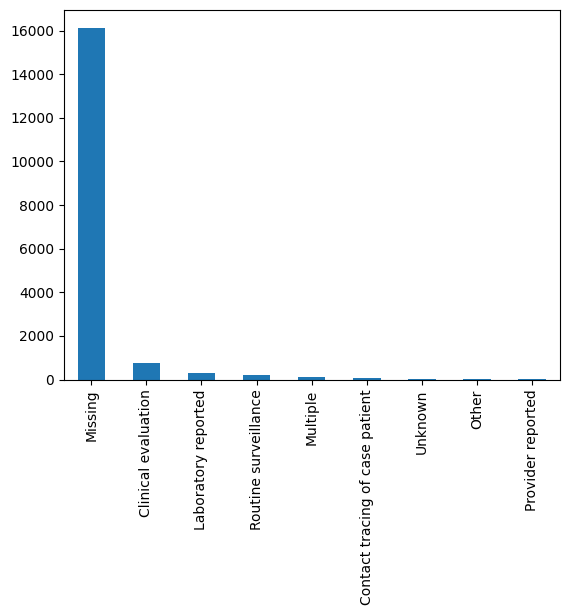

In [21]:
df_clean['process'].value_counts(dropna = False).plot(kind='bar')

As we can see from the above histogram, the vast majority of the data falls under the value of 'Missing', therefore this data is useless to us. We will do as we did with ethnicity and drop this feature

In [22]:
df_clean.drop('process', axis=1, inplace=True)
df_clean.dtypes

case_month                         category
age_group                          category
sex                                category
race                               category
case_positive_specimen_interval     float64
case_onset_interval                 float64
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

exposure_yn

<AxesSubplot: >

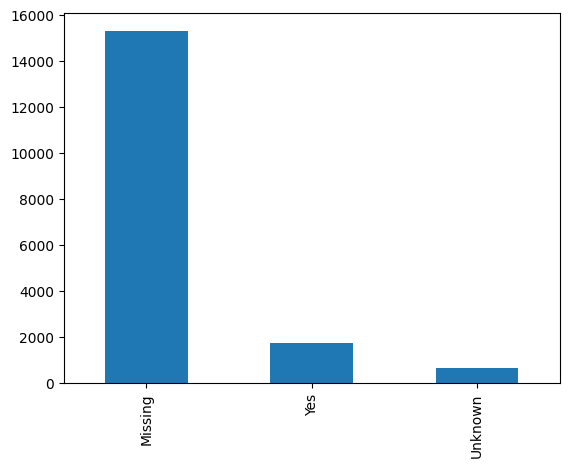

In [23]:
df_clean['exposure_yn'].value_counts(dropna = False).plot(kind='bar')

Once again, I see no other option than to drop this feature as the vast majority of the data is Missing

In [24]:
df_clean.drop('exposure_yn', axis=1, inplace=True)
df_clean.dtypes

case_month                         category
age_group                          category
sex                                category
race                               category
case_positive_specimen_interval     float64
case_onset_interval                 float64
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

current_status

<AxesSubplot: >

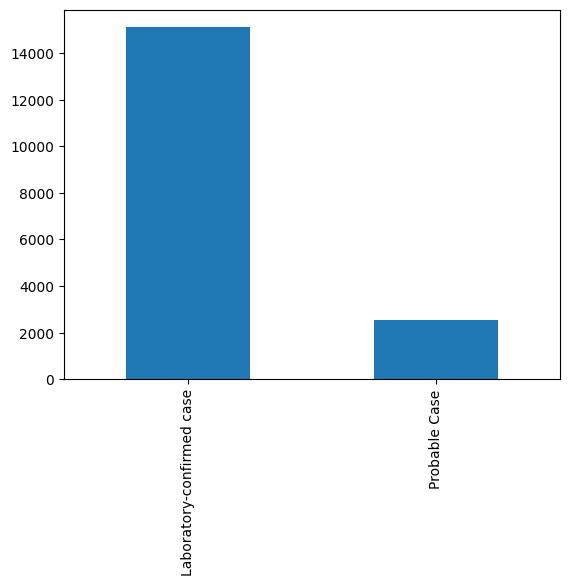

In [25]:
df_clean['current_status'].value_counts(dropna = False).plot(kind='bar')

This data does not need to be altered and gives us good information on the patient's current status in regards to having COVID

symptom_status

<AxesSubplot: >

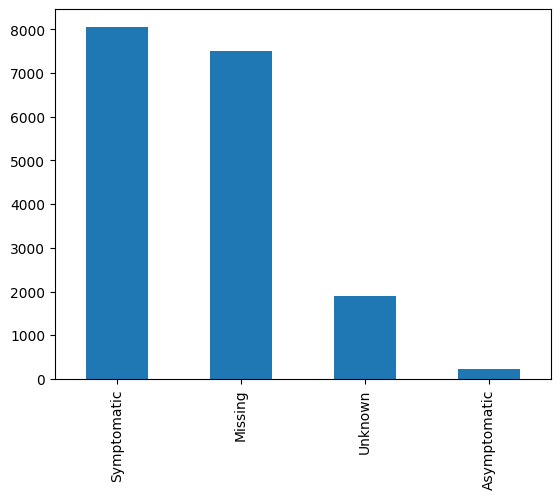

In [26]:
df_clean['symptom_status'].value_counts(dropna = False).plot(kind='bar')

We will keep things the same here and not change them as there is a good amount of information we can draw from the amount of symptomatic cases being reported

hosp_yn

<AxesSubplot: >

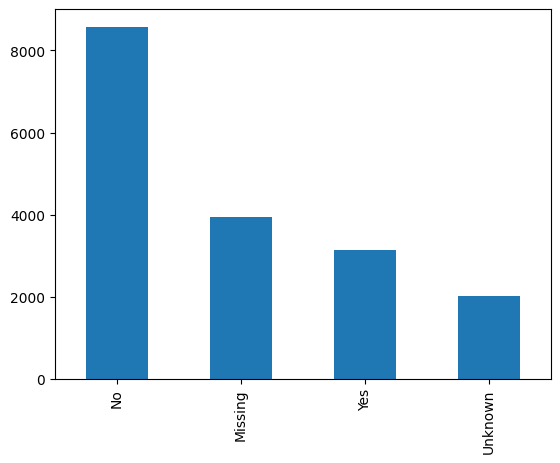

In [27]:
df_clean['hosp_yn'].value_counts(dropna = False).plot(kind='bar')

Once again it is a shame that we have so many missing and unknown values, but they are valid options from look at the CSV dictionary so we will keep all the elements here

icu_yn

<AxesSubplot: >

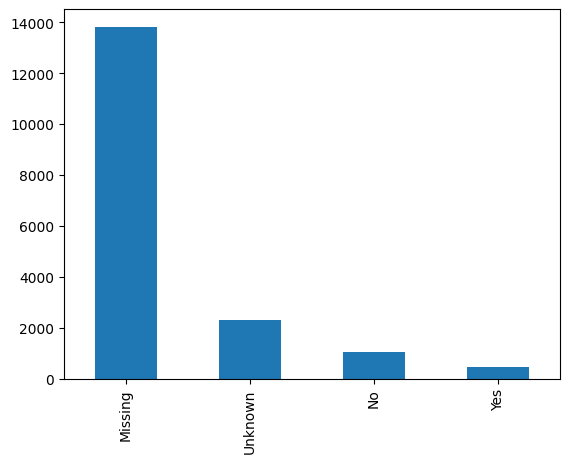

In [28]:
df_clean['icu_yn'].value_counts(dropna = False).plot(kind='bar')

Seeing as the majority of the data related to this feature is unusable to us, it makes no sense to use this in our data analysis. Therefore the only option to us here is to drop the feature entirely

In [29]:
df_clean.drop('icu_yn', axis=1, inplace=True)
df_clean.dtypes

case_month                         category
age_group                          category
sex                                category
race                               category
case_positive_specimen_interval     float64
case_onset_interval                 float64
current_status                     category
symptom_status                     category
hosp_yn                            category
death_yn                           category
underlying_conditions_yn           category
dtype: object

death_yn

<AxesSubplot: >

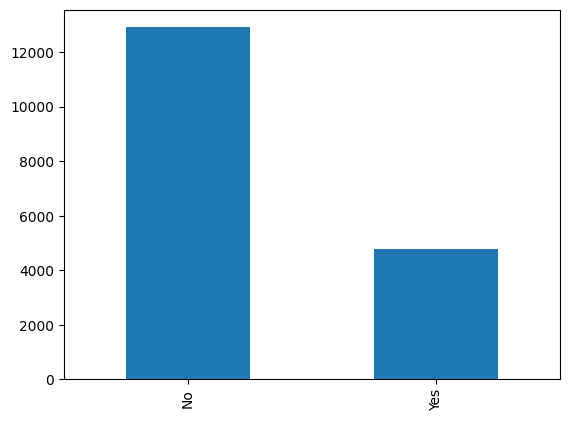

In [30]:
df_clean['death_yn'].value_counts(dropna = False).plot(kind='bar')

Of course we can keep this feature as there is no data that is out of the ordinary and it is the main focus of our analysis.

underlying_conditions_yn

<AxesSubplot: >

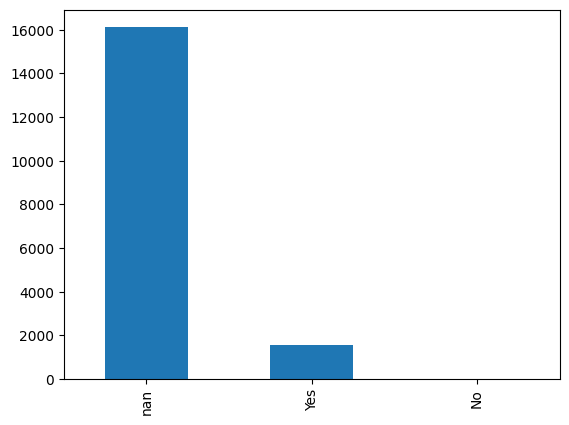

In [31]:
df_clean['underlying_conditions_yn'].value_counts(dropna = False).plot(kind='bar')

Seeing as the majority of the values are nan, there is on point keeping this feature, therefore we can go ahead and drop it

In [32]:
df_clean.drop('underlying_conditions_yn', axis=1, inplace=True)
df_clean.dtypes

case_month                         category
age_group                          category
sex                                category
race                               category
case_positive_specimen_interval     float64
case_onset_interval                 float64
current_status                     category
symptom_status                     category
hosp_yn                            category
death_yn                           category
dtype: object

Now that we have all the categorical features, we can have a look at the coninuous features

case_positive_specimen_interval


But before we do that let's export the new CSV with updated feature just to see if we can crack on with question 3

In [33]:
df_clean.to_csv('Covid19_Analysis_Ready.csv', index=False)